In [2]:
import os

# Define the path to the directory you want to switch to
new_directory = "C:\\Users\gaurav.goyal\Downloads"

# Change to the new directory
os.chdir(new_directory)

# Check the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\gaurav.goyal\Downloads


In [3]:
from sklearn.experimental import enable_iterative_imputer

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2244 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1091 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0887 
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0933 
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0886 
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0878 
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0862 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0765 
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0883 
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0827 
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0869 
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0784 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0888 
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

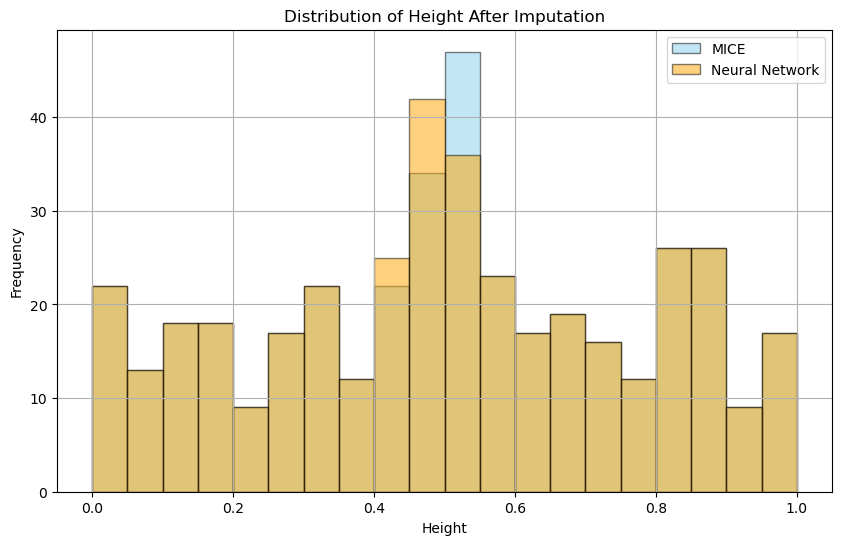

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('Parts and Dimesions.xlsx')

# Step 1: Remove Missing Data
data_cleaned = data.dropna(subset=['Length', 'Width', 'Height'])

# Step 2: Remove Outliers using Isolation Forest
isolation_forest = IsolationForest(random_state=42)
outliers = isolation_forest.fit_predict(data_cleaned[['Length', 'Width', 'Height']])
data_no_outliers = data_cleaned[outliers == 1]

# Step 3: Normalize Data using Min-Max Scaling
scaler = MinMaxScaler()
data_no_outliers.loc[:, ['Length', 'Width', 'Height']] = scaler.fit_transform(data_no_outliers[['Length', 'Width', 'Height']])

# Simulate missing data in 'Height' for demonstration
np.random.seed(42)
missing_indices = np.random.choice(data_no_outliers.index, size=int(0.1 * len(data_no_outliers)), replace=False)
data_no_outliers.loc[missing_indices, 'Height'] = np.nan

# Data Imputation using MICE
imputer_mice = IterativeImputer(random_state=42)
data_mice_imputed = imputer_mice.fit_transform(data_no_outliers[['Length', 'Width', 'Height']])

# Convert imputed data back to DataFrame
data_mice_imputed_df = pd.DataFrame(data_mice_imputed, columns=['Length', 'Width', 'Height'], index=data_no_outliers.index)

# Data Imputation using Neural Network
# Prepare the dataset for training the imputation model
train_data = data_no_outliers.dropna(subset=['Height'])
X_train = train_data[['Length', 'Width']]
y_train = train_data['Height']

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Set up early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# Train the model
model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping], verbose=1)

# Predicting the missing 'Height' values
predicted_heights = model.predict(data_no_outliers.loc[missing_indices, ['Length', 'Width']].values)

# Filling in the missing 'Height' values in the original dataset
data_nn_imputed = data_no_outliers.copy()
data_nn_imputed.loc[missing_indices, 'Height'] = predicted_heights.ravel()

# Display the imputation results in table form
print("MICE Imputation Results:")
print(data_mice_imputed_df.loc[missing_indices].head())
print("\nNeural Network Imputation Results:")
print(data_nn_imputed.loc[missing_indices].head())

# Visualizations
plt.figure(figsize=(10, 6))

# Histogram for MICE-imputed data
plt.hist(data_mice_imputed_df['Height'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='MICE')

# Histogram for neural network-imputed data
plt.hist(data_nn_imputed['Height'], bins=20, color='orange', edgecolor='black', alpha=0.5, label='Neural Network')

plt.title('Distribution of Height After Imputation')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
print("NaNs in MICE-imputed data:", data_mice_imputed_df.loc[missing_indices, 'Height'].isnull().sum())
print("NaNs in Neural Network-imputed data:", np.isnan(predicted_heights).sum())

NaNs in MICE-imputed data: 0
NaNs in Neural Network-imputed data: 0
